<a href="https://colab.research.google.com/github/Daz-Riza-Seriog/Tensorflow_ML/blob/main/2-Customise%20your%20Models/4-%20Week%204/4-Automatic%20Differentiation/Automatic_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Model subclassing and custom training loops

 ## Coding tutorials
 #### [1. Model subclassing](#coding_tutorial_1)
 #### [2. Custom layers](#coding_tutorial_2)
 #### [3. Automatic differentiation](#coding_tutorial_3)
 #### [4. Custom training loops](#coding_tutorial_4)
 #### [5. tf.function decorator](#coding_tutorial_5)

***
<a id="coding_tutorial_3"></a>
## Automatic differentiation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Create synthetic data

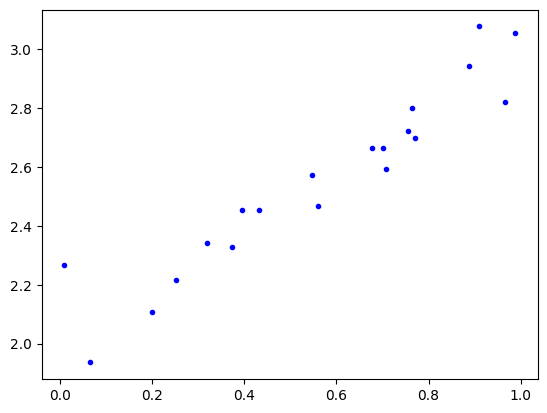

In [ ]:
# Create data from a noise contaminated linear model

def MakeNoisyData(m, b, n=20):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x),), stddev=0.1)
    y = m * x + b + noise
    return x, y

m=1
b=2
x_train, y_train = MakeNoisyData(m,b)
plt.plot(x_train, y_train, 'b.')

#### Define a linear regression model

In [ ]:
from tensorflow.keras.layers import Layer

In [ ]:
# Build a custom layer for the linear regression model

class LinearLayer(Layer):

  def __init__(self):
    super(LinearLayer, self).__init__()
    self.m = self.add_weight(np.shape(1,),
                             initializer="random_normal")
    self.b = self.add_weight(np.shape(1,),
                             initializer="zeros")

  def call(self,inputs):
    return self.m*inputs+self.b

linear_regression = LinearLayer()

print(linear_regression(x_train))
print(linear_regression.weights)

tf.Tensor(
[6.4541805e-03 6.0908118e-04 8.3013047e-03 3.4034851e-03 6.8841567e-03
 4.9886424e-03 3.5969787e-03 9.1838949e-05 8.1027625e-03 7.0365099e-03
 6.1680041e-03 1.8218845e-03 2.2988457e-03 2.9142729e-03 9.0083852e-03
 3.9497293e-03 6.9625112e-03 8.8003920e-03 5.1063821e-03 6.3937763e-03], shape=(20,), dtype=float32)
[<tf.Variable ':0' shape=() dtype=float32, numpy=0.009118682>, <tf.Variable ':0' shape=() dtype=float32, numpy=0.0>]


#### Define the loss function

In [ ]:
# Define the mean squared error loss function

def SquaredError(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

starting_loss = SquaredError(linear_regression(x_train), y_train)
print("Starting loss", starting_loss.numpy())

Starting loss 6.6129036


#### Train and plot the model

In [ ]:
# Implement a gradient descent training loop for the linear regression model

learning_rate = 0.05
steps = 25

for i in range(steps):

  with tf.GradientTape() as tape:
    predictions = linear_regression(x_train)
    loss = SquaredError(predictions, y_train)

  gradients = tape.gradient(loss, linear_regression.trainable_variables)

  linear_regression.m.assign_sub(learning_rate * gradients[0])
  linear_regression.b.assign_sub(learning_rate * gradients[1])

  print("Step %d, Loss %f"%(i,loss.numpy()))



Step 0, Loss 6.612904
Step 1, Loss 4.963023
Step 2, Loss 3.725503
Step 3, Loss 2.797279
Step 4, Loss 2.101046
Step 5, Loss 1.578821
Step 6, Loss 1.187112
Step 7, Loss 0.893300
Step 8, Loss 0.672915
Step 9, Loss 0.507606
Step 10, Loss 0.383608
Step 11, Loss 0.290594
Step 12, Loss 0.220822
Step 13, Loss 0.168482
Step 14, Loss 0.129218
Step 15, Loss 0.099761
Step 16, Loss 0.077660
Step 17, Loss 0.061077
Step 18, Loss 0.048632
Step 19, Loss 0.039292
Step 20, Loss 0.032281
Step 21, Loss 0.027016
Step 22, Loss 0.023061
Step 23, Loss 0.020089
Step 24, Loss 0.017854


m:1,  trained m:1.0972137451171875
b:2,  trained b:1.8650282621383667


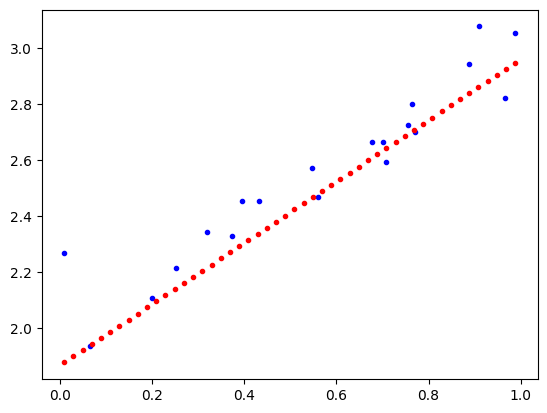

In [ ]:
# Plot the learned regression model

print("m:{},  trained m:{}".format(m,linear_regression.m.numpy()))
print("b:{},  trained b:{}".format(b,linear_regression.b.numpy()))

plt.plot(x_train, y_train, 'b.')

x_linear_regression=np.linspace(min(x_train), max(x_train),50)
plt.plot(x_linear_regression, linear_regression.m*x_linear_regression+linear_regression.b, 'r.')